In [8]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from RecUnet_entangled import *
from train_RecUnet_all import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
data = dataset_seq()
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)
loaders = get_loaders(data, 4)

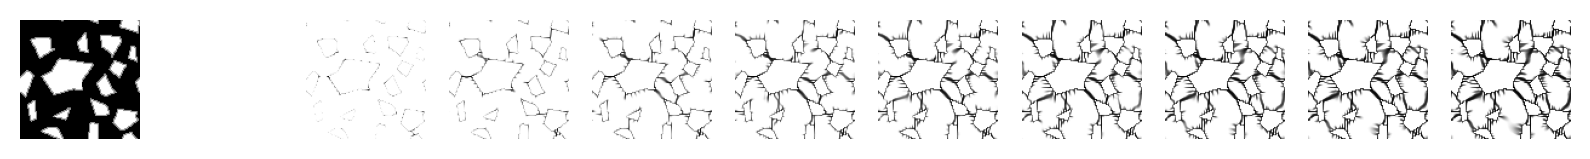

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [10]:
args = {'lr' : 0.00005, 'epochs' : 10, 'dev' : dev, 'name' : 'RecUnet_all'}

In [11]:
unet = RecUNet()

In [12]:
unet = load_network(unet, args['name']+'_9', args)

In [13]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  22715.9709582925
Epoch: 0 batch: 100 mean train loss:  23156.5476785898
Epoch: 0 batch: 200 mean train loss:  24001.9871927500
Epoch: 0 batch: 300 mean train loss:  19942.4746843129
Epoch: 0 batch: 400 mean train loss:  22721.3643914461
Epoch: 0 batch: 500 mean train loss:  21488.1533935666
Epoch: 0 batch: 600 mean train loss:  23496.9650985003
Epoch: 0 batch: 700 mean train loss:  24457.4849328995
Epoch: 0 batch: 800 mean train loss:  24928.5982132554
Epoch: 0 batch: 900 mean train loss:  23371.6226969361
Epoch: 0 batch: 1000 mean train loss:  23670.7560229301
Epoch: 0 batch: 1100 mean train loss:  23455.8867018223
Epoch: 0 batch: 1200 mean train loss:  24881.7195215225
Epoch: 0 batch: 1300 mean train loss:  22581.3054938316
Epoch: 0 batch: 1400 mean train loss:  22890.2094529867
Epoch: 0 batch: 1500 mean train loss:  26515.1534483433
Epoch: 0 batch: 1600 mean train loss:  20419.0417054892
Epoch: 0 batch: 1700 mean train loss:  22510.6648033857
Epoc

KeyboardInterrupt: 

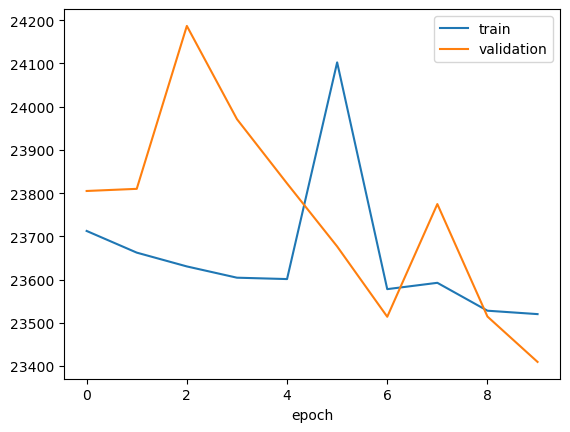

In [ ]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])